# Distinguish Your Own Digits (DYOD)

You are going to write a classifier that distinguishes between the number 3 and number 8.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

From the command line run `pip install mnist`. This is a library that will help you bring down the mnist dataset. If you run this from a notebook, you need to put  `!pip install mnist` in a cell by itself.

In [3]:
!pip install mnist

## Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


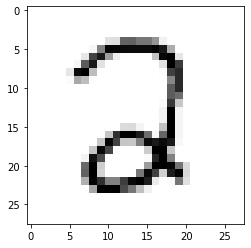

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]



We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

### 1. Use the following configuration (or similar) to set up your model for training.

```pythom
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 200
config.bs = 50
```

Make sure you import everything you need from the kudzu library provided. Fell free to change it if needed, but mention that in your solutions.


Now construct a model which has the following layers

1. A first affine layer which has 784 inputs and does 100 affine transforms. These are followed by a `Relu`
2. A second affine layer which has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a `Relu`
3. A third affine layer which has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
4. A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.

### 2. Create a callback class

Lets call it `ClfCallback` or classifier-callback. You can build it as a subclass of `AccClallback` or just copy and paste the code. But it needs some new functionality:

1. Initialize it to have accuracy arrays 

```python
        self.accuracies = []
        self.test_accuracies = []
```
2. Then at the end of each epoch, calculate the probabilities and hence predictions on both the training set and the test set. Print these out once per epoch. Acumulate these in the above array. This will require you to keep track of all 4 training and test sets. You can edit the `Learner` for this or pass these sets in some kind of data object to the callback.

### 3. Train the model

Train the model for 200, or if needed, some more epochs with a low learning rate. You will find that your losses will not have converged to a completely flat level before gradients start to blow up. The reason for this is the high or low probability instabilities (the $\frac{dL}{dp}$ gradient) , and also possibly other numerical instabilities..see http://fa.bianp.net/blog/2019/evaluate_logistic/ for more details.

Stop the training at 200-300 epochs. When you plot the training and validation accuracies you will see the model is already overfitting: the validation accuracy will have dipped below the training accuracy, and they are diverging.

Overfitting happens when your model is quite complex and is fitting to the noise in the training set rather than the signal.

### 4. Plot the results

What accuracy do we get? How many False positives and False negatives.

Specifically, in the embedding space ( the inputs of the "logistic regression") plot the data points by running them forward through the network. Color code them with their actual class and plot the probability contours (these will all be lines in the embedding space as from here on, this is a logistic regression). This plot should allow one to see the points stranded on the "wrong" side of the probability 1/2 line. Also plot the predictions against the actual values on a plot of your choice, showing where they are in the embedding space.

### 5. OPTIONAL AND EXTRA CREDIT

1. Compare your neural network to a simple logistic regression model.
2. Put your notebook on your blog, communicating how you carried out your analysis.